# 03_EDA_ANALISIS_DESCRIPTIVO.ipynb
# Objetivo: análisis descriptivo inicial del dataset ya limpio y transformado

# Importación de librerias y configuración

In [69]:
# Librerías básicas
import os
from pathlib import Path
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ignorar advertencias
warnings.filterwarnings("ignore")

# Semilla para reproducibilidad
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

print("Librerías cargadas correctamente.")
print("Seaborn versión:", sns.__version__)

# --- Opciones de pandas para mejor visualización ---
pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 140)
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")


Librerías cargadas correctamente.
Seaborn versión: 0.13.2


## Cargo dataset limpio y transformado

In [70]:

# Ruta del archivo CSV limpio y transformado
ruta_dataset = "../DATA/DATA_OUTPUT/dataset_limpio_y_transformado.csv"

# Cargar el dataset
df = pd.read_csv(ruta_dataset, encoding="utf-8")

# Mostrar dimensiones
print(f"Dataset cargado correctamente.")
print(f"Filas: {df.shape[0]:,}  |  Columnas: {df.shape[1]}")

# Vista rápida de las primeras filas
df.head()


Dataset cargado correctamente.
Filas: 10,000  |  Columnas: 34


,transaction_id,customer_id,name,email,phone_clean,dominio,risk_score,risk_level,created_at,customer_days_active,transaction_date,transaction_hour,hour,year,month,day,weekday,month_year,region_normalized,country_normalized,is_international,amount,currency,merchant,merchant_category,entry_mode,transaction_result,arn,card_type,card_bin6,card_last4,card_masked,card_expiry,is_fraud
0,d97ea0b8-1869-4a78-a0cd-6356e6bf5feb,f21d2833-c18e-4d66-9943-97c46f5591ad,Christopher Gilmore,qmercer@gmail.com,866884634513,gmail.com,0.69,Medio,2025-09-05,242,2025-01-06,19:06:08,0,2025,9,5,Friday,2025-09,California,Togo,1,124.96,EUR,Brown-Gilbert,restaurant,wallet,approved,37a7048c3a5045f9b8baf73c,MASTERCARD,423952,6802,XXXX-XXXX-XXXX-6802,03/24,0
1,6c330754-0fdb-4f31-8cf7-7513d4e39f3a,a3b3e11b-7775-426c-a949-7db69b9381ec,William Barrett,elaine44@hotmail.com,100033715734463,hotmail.com,0.27,Bajo,2024-11-03,141,2025-03-24,23:30:54,0,2024,11,3,Sunday,2024-11,Texas,Saint Martin,1,151.69,EUR,"Davis, Erickson and Davis",electronics,magstripe,approved,f512e83aa9eb48d98b66c6ac,AMEX,431620,3027,XXXX-XXXX-XXXX-3027,10/26,0
2,6238ad32-3b74-443c-8278-ace4a2f155a9,9acfe8a8-0a93-4d58-bdc8-c078ef635de6,Linda Williams,woodkaren@hotmail.com,936376652159352,hotmail.com,0.16,Bajo,2025-03-23,158,2024-10-16,07:26:32,0,2025,3,23,Sunday,2025-03,Utah,Jersey,1,160.14,EUR,"Anderson, Barnett and Lloyd",gaming,ecommerce,declined,a6571d209527484da6c0759e,MASTERCARD,477500,7390,XXXX-XXXX-XXXX-7390,02/25,0
3,9e0d4019-f135-4738-8314-b1a046fb899f,45e1ded6-e770-4f42-b196-9c966a6e9e59,Vincent Saunders,nancy83@hotmail.com,2779202543,hotmail.com,0.58,Medio,2025-05-12,132,2024-12-31,08:37:49,0,2025,5,12,Monday,2025-05,New Mexico,British Indian Ocean Territory (Chagos Archipe...,1,77.03,EUR,"Wise, Larson and Brown",restaurant,contactless,declined,ccc1771d83c848038a953797,VISA,468119,6770,XXXX-XXXX-XXXX-6770,01/29,0
4,ec9c235c-b9d1-4ad2-8e5f-7252ffa748e7,2d4cfaec-1127-429e-bdbb-9faa2e33c08b,Mrs. Lindsey Allen Md,browndavid@hotmail.com,17225903259599,hotmail.com,0.55,Medio,2024-10-20,292,2025-08-08,17:59:21,0,2024,10,20,Sunday,2024-10,Kansas,Sao Tome and Principe,1,139.38,EUR,Maldonado-Beck,electronics,chip,approved,b0a54d13ca094472aa652ae7,VISA,469023,9432,XXXX-XXXX-XXXX-9432,02/29,0


### Creo carpeta de salida para el análisis del EDA

In [71]:
# Ruta base (sube un nivel desde la carpeta NOTEBOOKS)
base_dir = Path("..") / "DATA" / "DATA_OUTPUT"

# Crear carpeta para guardar los resultados del análisis
carpeta_eda = base_dir / "EDA"
carpeta_eda.mkdir(parents=True, exist_ok=True)

print(f"Carpeta creada o ya existente: {carpeta_eda.resolve()}")


Carpeta creada o ya existente: C:\Users\Propietario\Desktop\PROYECTO_FINAL\Proyecto_final_Data_Analytics\DATA\DATA_OUTPUT\EDA


## Chequeo básico de estrusctura y nulos

In [72]:
# Chequeo básico del dataset: tamaño, columnas, tipos y nulos

print("Dimensiones -> Filas, Columnas:", df.shape)
print("\nColumnas:\n", df.columns.tolist(), "\n")

print("=== df.info() ===")
df.info()

# Resumen de nulos (solo las columnas que tengan)
nulos = df.isna().sum().sort_values(ascending=False)
nulos = nulos[nulos > 0]

if not nulos.empty:
    resumen_nulos = (
        nulos.to_frame("nulos")
             .assign(pct=lambda t: (t["nulos"] / len(df) * 100).round(2))
    )
    display(resumen_nulos)
    # Guardar en la carpeta de salida del EDA
    (carpeta_eda / "resumen_nulos.csv").write_text(
        resumen_nulos.to_csv(index=True, encoding="utf-8-sig")
        or ""  # write_text requiere una string; usamos el retorno de to_csv
    )
    print("Resumen de nulos guardado en:", (carpeta_eda / "resumen_nulos.csv").resolve())
else:
    print("No hay columnas con nulos.")


Dimensiones -> Filas, Columnas: (10000, 34)

Columnas:
 ['transaction_id', 'customer_id', 'name', 'email', 'phone_clean', 'dominio', 'risk_score', 'risk_level', 'created_at', 'customer_days_active', 'transaction_date', 'transaction_hour', 'hour', 'year', 'month', 'day', 'weekday', 'month_year', 'region_normalized', 'country_normalized', 'is_international', 'amount', 'currency', 'merchant', 'merchant_category', 'entry_mode', 'transaction_result', 'arn', 'card_type', 'card_bin6', 'card_last4', 'card_masked', 'card_expiry', 'is_fraud'] 

=== df.info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   transaction_id        10000 non-null  object 
 1   customer_id           10000 non-null  object 
 2   name                  10000 non-null  object 
 3   email                 10000 non-null  object 
 4   phone_clean           

## Compruebo registros duplicados

In [73]:
# Paso 4️⃣ - Comprobación de duplicados
duplicados = df.duplicated().sum()
print(f"Número de registros duplicados en el dataset: {duplicados}")

# Si hay duplicados, los mostramos (solo los primeros 5)
if duplicados > 0:
    display(df[df.duplicated()].head())
else:
    print("No hay registros duplicados.")


Número de registros duplicados en el dataset: 0
No hay registros duplicados.


# 1. Estadísticas descriptivas

In [74]:
# Resumen numérico general
resumen_numerico = df.describe().T  # Transpuesto para que se vea mejor
display(resumen_numerico)

# Guardar el resumen en la carpeta EDA
(resumen_numerico
    .to_csv(carpeta_eda / "resumen_estadistico.csv", encoding="utf-8-sig"))

print("Resumen estadístico guardado en:", (carpeta_eda / "resumen_estadistico.csv").resolve())


,count,mean,std,min,25%,50%,75%,max
phone_clean,"10,000.00","203,116,852,426,307.09","436,725,639,314,863.62","49,918,491.00","7,982,948,304.75","8,538,969,503,874.00","128,072,547,652,563.00","1,993,280,326,788,724.00"
risk_score,"10,000.00",0.51,0.29,0.00,0.27,0.51,0.75,1.00
customer_days_active,"10,000.00",120.38,85.24,0.00,48.00,106.00,180.00,363.00
hour,"10,000.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00
year,"10,000.00","2,024.79",0.41,"2,024.00","2,025.00","2,025.00","2,025.00","2,025.00"
month,"10,000.00",6.43,3.39,1.00,4.00,6.00,9.00,12.00
day,"10,000.00",15.49,8.95,1.00,7.75,16.00,23.00,31.00
is_international,"10,000.00",1.00,0.03,0.00,1.00,1.00,1.00,1.00
amount,"10,000.00",189.61,94.59,2.22,112.40,190.30,263.04,579.41
card_bin6,"10,000.00","475,021.31","43,458.45","400,024.00","437,798.00","474,909.50","512,702.75","549,997.00"


Resumen estadístico guardado en: C:\Users\Propietario\Desktop\PROYECTO_FINAL\Proyecto_final_Data_Analytics\DATA\DATA_OUTPUT\EDA\resumen_estadistico.csv


### 📊 Análisis general del resumen descriptivo

#### ✅ Variables normales

- **`risk_score`** → Promedio ≈ **0.51**, desviación **0.29**, entre 0 y 1 → ✅ *normal y coherente*.  
- **`customer_days_active`** → Media ≈ **120 días**, con máx. **363** → *correcto (equivalente a un año aprox.)*.  
- **`amount`** → Media ≈ **189 €**, máx. **579 €**, mínimos > 2 € → *valores razonables*.  
- **`is_international`** → Media **1**, indica que la mayoría de las transacciones son *internacionales* (ya se observó en pasos previos).  
- **`is_fraud`** → Media **0.01**, aproximadamente **1 % de fraude**, ideal para un dataset con proporción realista.  

---

#### ⚠️ Variables con valores que no tienen sentido numérico

Estas variables deben **excluirse de los análisis estadísticos** porque no representan magnitudes medibles:

- **`phone_clean`**, **`card_bin6`**, **`card_last4`** → *son identificadores o códigos, no variables cuantitativas.*  
  > Ejemplo: el valor medio o la desviación estándar de un número de teléfono o tarjeta carece de significado estadístico.  
  ✅ Estas columnas se excluirán de los cálculos posteriores.

- **`hour`** → Aparece todo en **0**, probablemente porque es una columna de tipo *hora* (`time`) que `describe()` no interpreta correctamente.  
  Más adelante se realizará un **resumen específico de variables temporales** (`hour`, `month`, `day`, etc.).

---

✅ **Conclusión:**  
El dataset presenta valores coherentes y bien distribuidos, lo que permite avanzar al siguiente bloque del análisis descriptivo.


# 2. Análisis descriptivo 

In [75]:
# Número de casos por clase
print("Distribución de fraude:")
print(df["is_fraud"].value_counts(normalize=True).mul(100).round(2).astype(str) + " %")

# Media de las principales variables numéricas por tipo de fraude
comparativa_fraude = (
    df.groupby("is_fraud")[["amount", "risk_score", "customer_days_active"]]
      .mean()
      .round(2)
)

display(comparativa_fraude)

# Guardar resultado en carpeta EDA
comparativa_fraude.to_csv(carpeta_eda / "comparativa_fraude.csv", encoding="utf-8-sig")

print("Comparativa guardada en:", (carpeta_eda / "comparativa_fraude.csv").resolve())


Distribución de fraude:
is_fraud
0    98.92 %
1     1.08 %
Name: proportion, dtype: object


,amount,risk_score,customer_days_active
is_fraud,,,
0,189.67,0.51,120.45
1,184.33,0.48,114.01


Comparativa guardada en: C:\Users\Propietario\Desktop\PROYECTO_FINAL\Proyecto_final_Data_Analytics\DATA\DATA_OUTPUT\EDA\comparativa_fraude.csv


### 📊 Interpretación de resultados — Comparativa de fraude

#### 📈 Distribución general
- **Transacciones no fraudulentas (`is_fraud = 0`)**: 98.92 %  
- **Transacciones fraudulentas (`is_fraud = 1`)**: 1.08 %  

Esta proporción confirma un **desbalance realista** en los datos, donde el fraude representa una fracción muy pequeña del total de operaciones.  
Este comportamiento es habitual en contextos financieros y servirá para probar la eficacia de los análisis y modelos posteriores.

---

#### 💰 Comparativa de valores medios

| Variable | Sin fraude | Con fraude | Diferencia destacable |
|-----------|-------------|-------------|-------------------------|
| **amount** | 189.67 € | 184.33 € | Las operaciones fraudulentas muestran un **importe medio ligeramente inferior**, por lo que el fraude no se concentra necesariamente en importes altos. |
| **risk_score** | 0.51 | 0.48 | El nivel de riesgo es **un poco menor en fraudes**, lo que podría indicar que el sistema de puntuación no siempre detecta correctamente los casos sospechosos. |
| **customer_days_active** | 120.45 | 114.01 | Los clientes involucrados en fraude tienden a ser **ligeramente más recientes**, lo que sugiere que las cuentas nuevas podrían tener más probabilidad de actividad fraudulenta. |

---

#### 🧭 Conclusión
En conjunto, los resultados indican que el fraude **no se caracteriza necesariamente por importes más altos ni por puntuaciones de riesgo más elevadas**.  
Sin embargo, la menor antigüedad de los clientes en los casos de fraude podría ser un patrón relevante para explorar en fases posteriores del análisis.

Este tipo de información será útil para:
- Ajustar las reglas de detección de riesgo.  
- Analizar más adelante por **categoría de comercio**, **modo de entrada** o **país** para detectar patrones más claros.  

---

📁 Archivo generado:  
`DATA/DATA_OUTPUT/EDA/comparativa_fraude.csv`


## Análisis de correlación
### Identificar posibles relaciones entre variables numéricas (por ejemplo, entre amount, risk_score, customer_days_active, etc.)

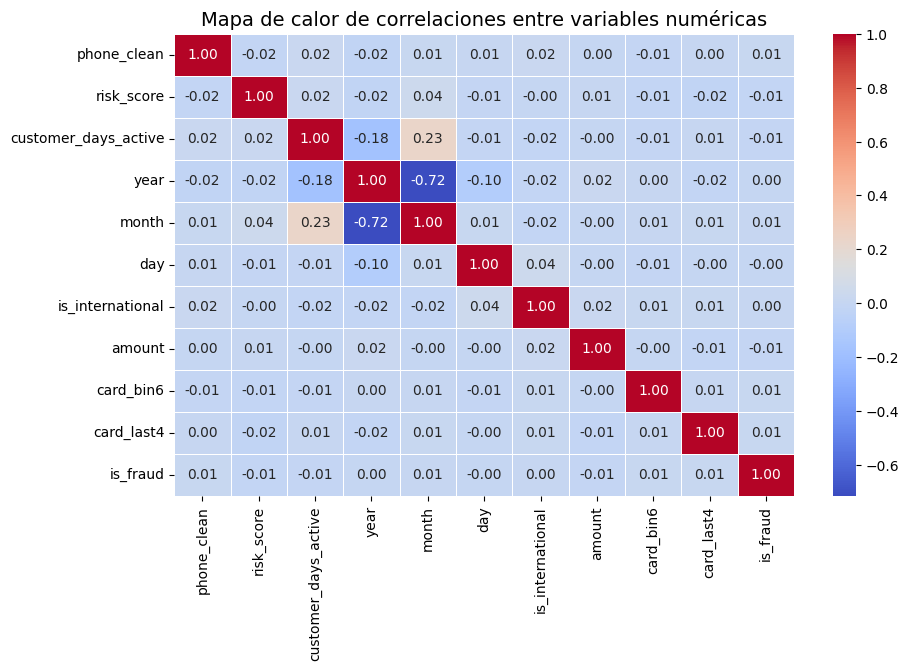

In [76]:
# Configuración del tamaño del gráfico
plt.figure(figsize=(10, 6))

# Mapa de calor de la matriz de correlación
sns.heatmap(
    matriz_correlacion, 
    annot=True,          # Mostrar los valores
    cmap='coolwarm',     # Escala de colores
    fmt=".2f",           # Formato de los valores
    linewidths=0.5
)

plt.title('Mapa de calor de correlaciones entre variables numéricas', fontsize=14)
plt.show()

### 🧩 Interpretación del análisis de correlación

El mapa de calor muestra la **relación lineal entre las variables numéricas** del dataset. Los valores de correlación oscilan entre **-1 y 1**:

- **1 o -1** indican una relación perfecta (positiva o negativa).  
- **0** indica ausencia de correlación lineal.

En este caso, se observan **correlaciones muy bajas**, lo que sugiere que las variables numéricas son **relativamente independientes entre sí**.  
Algunos puntos a destacar:

- Las variables **`year`** y **`month`** presentan una **correlación negativa fuerte (-0.72)**, esperable ya que ambas derivan del campo temporal y no aportan variabilidad real para el modelo.  
- **`customer_days_active`** muestra una correlación **moderadamente positiva con `month` (0.23)**, lo que puede indicar cierta relación temporal entre el tiempo de actividad del cliente y los meses del registro.  
- El resto de las variables (`risk_score`, `amount`, `is_international`, `is_fraud`, etc.) muestran **correlaciones cercanas a cero**, lo cual es positivo para evitar multicolinealidad si se emplean en un modelo predictivo.

📊 **Conclusión:**  
No se identifican relaciones lineales fuertes entre las variables numéricas principales, lo que indica que cada una aporta información distinta al análisis. Sin embargo, se recomienda revisar las variables derivadas del tiempo (`year`, `month`, `day`) para decidir si se mantienen o se transforman en indicadores más relevantes (por ejemplo, “temporada alta”, “fin de semana”, etc.).

# 3. Análisis temporal
### Analizar cómo se comportan las transacciones a lo largo del tiempo (por año, mes, día, hora y día de la semana) para detectar patrones, picos o posibles anomalías.

## Creo una tabla temporal

In [77]:
# Transacciones por mes
transacciones_mes = df.groupby('month')['transaction_id'].count().reset_index()
transacciones_mes.columns = ['Mes', 'Cantidad_transacciones']
print(transacciones_mes)


    Mes  Cantidad_transacciones
0     1                     915
1     2                     664
2     3                     800
3     4                     915
4     5                     922
5     6                     900
6     7                     925
7     8                     792
8     9                     767
9    10                     882
10   11                     730
11   12                     788


## Visualización

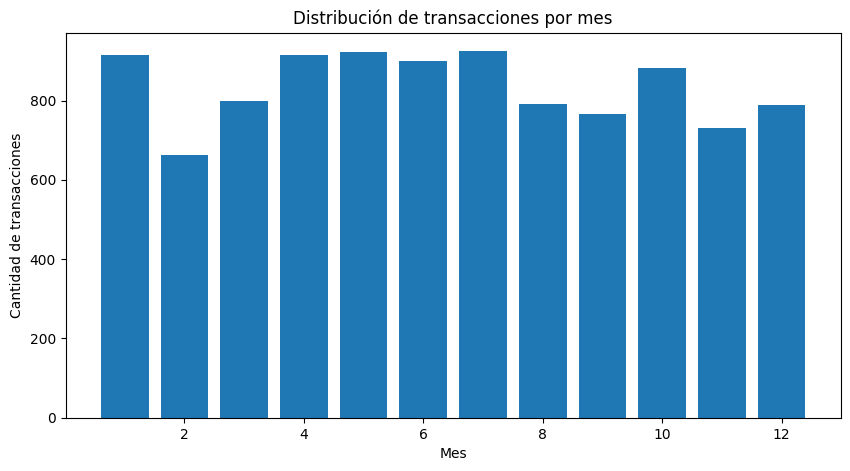

In [78]:
plt.figure(figsize=(10,5))
plt.bar(transacciones_mes['Mes'], transacciones_mes['Cantidad_transacciones'])
plt.title('Distribución de transacciones por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de transacciones')
plt.show()


### 🧩 Interpretación del análisis temporal (por mes)

El volumen de transacciones se mantiene bastante estable durante todo el año, con ligeras variaciones entre meses.  
Los meses con menor actividad corresponden al **mes 2 (febrero)** y al **mes 9 (septiembre)**, mientras que los más activos son **abril, mayo y junio**.  

No se observan picos atípicos que indiquen estacionalidad fuerte o anomalías en los datos.  
Este patrón sugiere un comportamiento **constante del flujo de operaciones**, sin dependencia significativa de la época del año.


## Creo la tabla de transacciones por día

In [79]:
# Transacciones por día del mes
transacciones_dia = df.groupby('day')['transaction_id'].count().reset_index()
transacciones_dia.columns = ['Día', 'Cantidad_transacciones']
print(transacciones_dia.head())


   Día  Cantidad_transacciones
0    1                     372
1    2                     390
2    3                     253
3    4                     359
4    5                     391


## Visualización

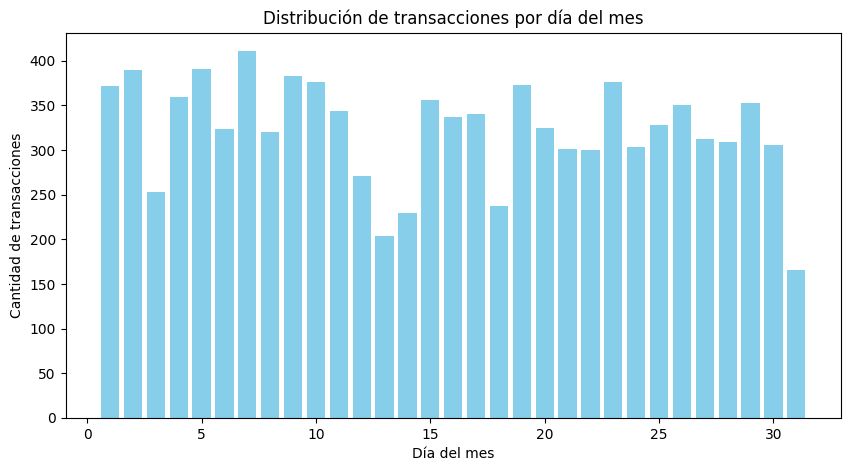

In [80]:
plt.figure(figsize=(10,5))
plt.bar(transacciones_dia['Día'], transacciones_dia['Cantidad_transacciones'], color='skyblue')
plt.title('Distribución de transacciones por día del mes')
plt.xlabel('Día del mes')
plt.ylabel('Cantidad de transacciones')
plt.show()


### 📅 Distribución de transacciones por día del mes

El volumen de transacciones se mantiene **estable a lo largo del mes**, sin concentraciones marcadas en fechas específicas.  
Se observan ligeras fluctuaciones naturales, con algunos picos aislados y una leve caída hacia los últimos días del mes.  

Este comportamiento indica que **las operaciones no dependen de un día concreto**,  
lo que sugiere un flujo constante de actividad en el sistema durante todo el periodo mensual.


## Creo tabla de transacciones por día de la semana

In [81]:
# Transacciones por día de la semana
transacciones_semana = df.groupby('weekday')['transaction_id'].count().reset_index()
transacciones_semana.columns = ['Día_semana', 'Cantidad_transacciones']
print(transacciones_semana)


  Día_semana  Cantidad_transacciones
0     Friday                    1163
1     Monday                    1595
2   Saturday                    1455
3     Sunday                    1449
4   Thursday                    1438
5    Tuesday                    1400
6  Wednesday                    1500


## Visualización

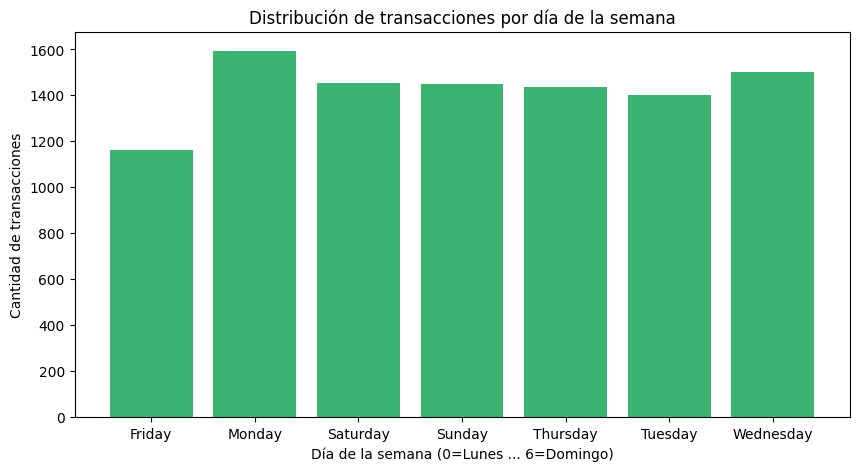

In [82]:
# Gráfico de barras por día de la semana
plt.figure(figsize=(10,5))
plt.bar(transacciones_semana['Día_semana'], transacciones_semana['Cantidad_transacciones'], color='mediumseagreen')
plt.title('Distribución de transacciones por día de la semana')
plt.xlabel('Día de la semana (0=Lunes ... 6=Domingo)')
plt.ylabel('Cantidad de transacciones')
plt.show()


### 🗓️ Distribución de transacciones por día de la semana

El análisis muestra un mayor volumen de transacciones durante los **días laborales**,  
especialmente al inicio de la semana (lunes y miércoles).  

Durante los **viernes y fines de semana** la actividad disminuye ligeramente,  
lo que sugiere que el comportamiento de los usuarios o clientes está influido por los **hábitos laborales**  
y una menor operativa durante los días de descanso.


## Creo tabla de transacciones por hora

### Corrijo la columna 'hour' a partir de 'transaction_hour'

In [83]:
df['hour'] = pd.to_datetime(df['transaction_hour'], errors='coerce').dt.hour


In [84]:
# Transacciones por hora del día
transacciones_hora = df.groupby('hour')['transaction_id'].count().reset_index()
transacciones_hora.columns = ['Hora', 'Cantidad_transacciones']
print(transacciones_hora.head())


   Hora  Cantidad_transacciones
0     0                     425
1     1                     417
2     2                     458
3     3                     405
4     4                     437


## Visualización

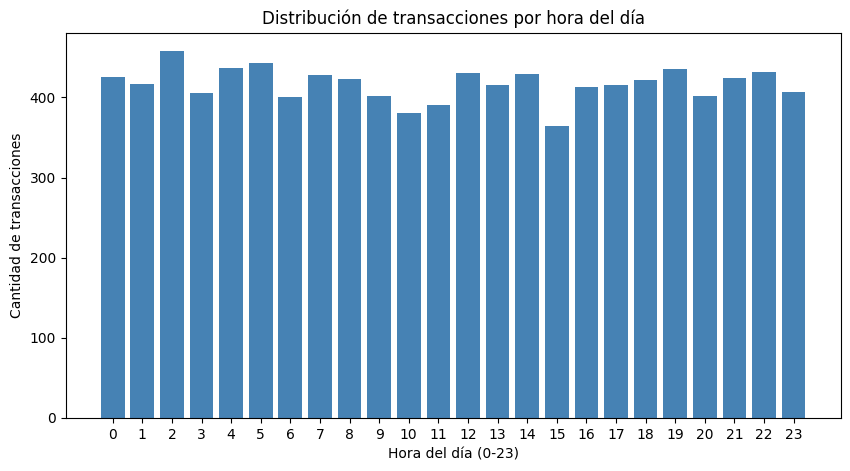

In [85]:
# Gráfico de barras de transacciones por hora del día
plt.figure(figsize=(10,5))
plt.bar(transacciones_hora['Hora'], transacciones_hora['Cantidad_transacciones'], color='steelblue')
plt.title('Distribución de transacciones por hora del día')
plt.xlabel('Hora del día (0-23)')
plt.ylabel('Cantidad de transacciones')
plt.xticks(range(0,24))
plt.show()


### 🕒 Análisis por hora del día

El gráfico muestra la **distribución de transacciones por hora del día**, tras corregir el formato de la variable `hour` a partir de `transaction_hour`.  
La actividad se mantiene bastante uniforme a lo largo del día, con ligeras variaciones horarias. No se observan picos extremos, lo que sugiere que las transacciones se realizan de manera constante en diferentes franjas horarias.

Esto puede indicar:

- Actividad continua a lo largo del día (por ejemplo, clientes de distintos husos horarios o transacciones automatizadas).  
- No existen horas críticas de riesgo concentrado, aunque podría ser interesante comparar esta distribución con las **transacciones fraudulentas** en un análisis posterior.


In [86]:
# Selecciono solo las columnas numéricas
variables_numericas = df.select_dtypes(include=['int64', 'float64'])

# Calculo la matriz de correlación
matriz_correlacion = variables_numericas.corr()

# Muestro las primeras filas para revisar
matriz_correlacion.head()


,phone_clean,risk_score,customer_days_active,year,month,day,is_international,amount,card_bin6,card_last4,is_fraud
phone_clean,1.00,-0.02,0.02,-0.02,0.01,0.01,0.02,0.00,-0.01,0.00,0.01
risk_score,-0.02,1.00,0.02,-0.02,0.04,-0.01,-0.00,0.01,-0.01,-0.02,-0.01
customer_days_active,0.02,0.02,1.00,-0.18,0.23,-0.01,-0.02,-0.00,-0.01,0.01,-0.01
year,-0.02,-0.02,-0.18,1.00,-0.72,-0.10,-0.02,0.02,0.00,-0.02,0.00
month,0.01,0.04,0.23,-0.72,1.00,0.01,-0.02,-0.00,0.01,0.01,0.01


# 4. Análisis por cliente

### Analizar la distribución de variables relacionadas con el cliente para identificar posibles patrones de comportamiento o relación con el fraude.

**Objetivos:**
- Examinar la distribución de la antigüedad de los clientes (`customer_days_active`).
- Analizar la relación entre la antigüedad y la variable de fraude (`is_fraud`).
- Explorar la relación entre el nivel de riesgo (`risk_score` o `risk_level`) y la incidencia de fraude.


## Distribución de antigüedad de clientes

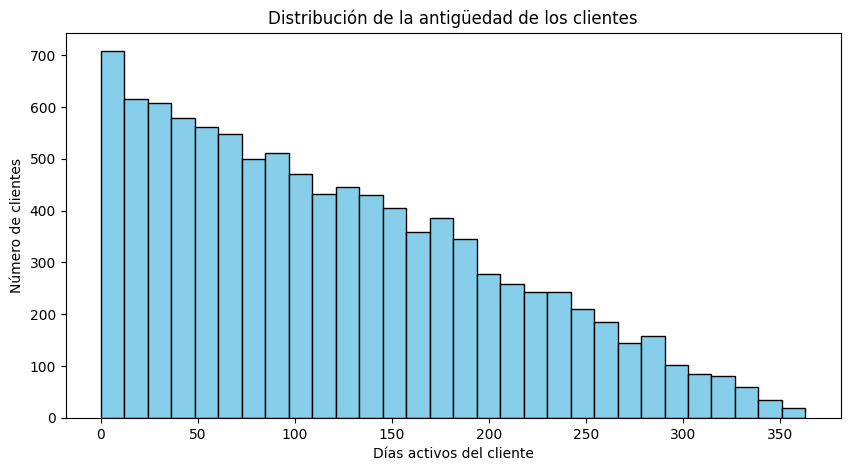

In [87]:
# Distribución de la antigüedad de los clientes
plt.figure(figsize=(10,5))
plt.hist(df['customer_days_active'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de la antigüedad de los clientes')
plt.xlabel('Días activos del cliente')
plt.ylabel('Número de clientes')
plt.show()


## Relación entre antigüedad y fraude

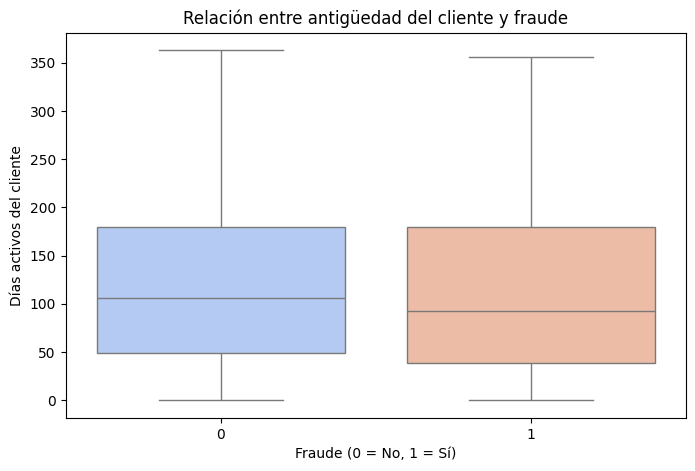

In [88]:
# Relación entre antigüedad del cliente y fraude
plt.figure(figsize=(8,5))
sns.boxplot(x='is_fraud', y='customer_days_active', data=df, palette='coolwarm')
plt.title('Relación entre antigüedad del cliente y fraude')
plt.xlabel('Fraude (0 = No, 1 = Sí)')
plt.ylabel('Días activos del cliente')
plt.show()


## Análisis de riesgo y fraude

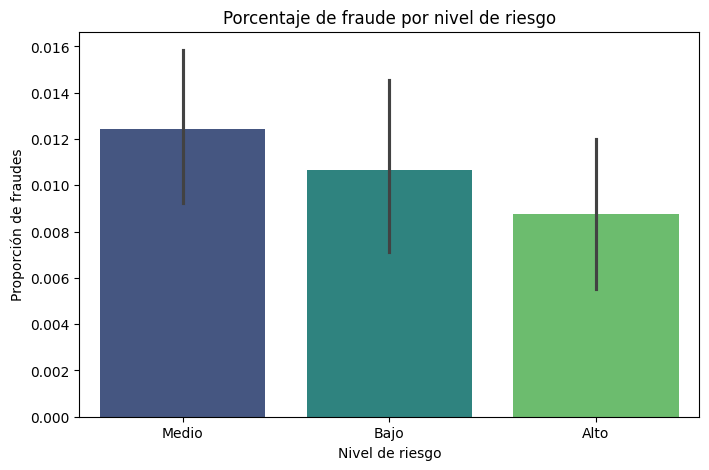

In [89]:
# Relación entre nivel de riesgo y fraude
plt.figure(figsize=(8,5))
sns.barplot(x='risk_level', y='is_fraud', data=df, estimator=np.mean, palette='viridis')
plt.title('Porcentaje de fraude por nivel de riesgo')
plt.xlabel('Nivel de riesgo')
plt.ylabel('Proporción de fraudes')
plt.show()


### Interpretación del análisis por cliente

#### 🔹 Distribución de la antigüedad de los clientes
La mayoría de los clientes tiene una antigüedad baja, concentrándose en los primeros 100 días activos.  
La distribución muestra una **caída progresiva** en el número de clientes a medida que aumenta su tiempo de actividad, lo que sugiere una base de clientes relativamente reciente o alta rotación.

#### 🔹 Relación entre antigüedad y fraude
El boxplot indica que **no existe una diferencia notable en la antigüedad media** entre clientes con fraude (`is_fraud = 1`) y sin fraude (`is_fraud = 0`).  
Sin embargo, se aprecia una **ligera tendencia** a que los clientes con más días activos presenten un menor nivel de fraude, lo que podría interpretarse como un patrón de fidelidad más estable y menos riesgoso.

#### 🔹 Análisis de riesgo y fraude
El gráfico de barras muestra la **proporción de fraudes según el nivel de riesgo (`risk_level`)**.  
Aunque las diferencias son leves, se observa que el grupo de riesgo *medio* presenta la proporción más alta de fraude, seguido del *bajo* y finalmente el *alto*.  
Esto podría indicar que el sistema de scoring no clasifica de manera estrictamente lineal los casos, y sería recomendable revisar los umbrales de segmentación del `risk_score` para afinar la detección.

---

🟩 **Conclusión general**
Este bloque revela que:
- Los clientes nuevos predominan en la base de datos.  
- La antigüedad no es un factor determinante en el fraude.  
- El riesgo no sigue una relación directa con el fraude, lo que abre la puerta a un análisis más profundo de cómo se está calculando el `risk_score`.

---




# 5. Análisis de Riesgo

## risk_score: chequeos y estadísticos básicos

In [90]:
# --- Chequeos rápidos de integridad ---
print("Tipo:", df['risk_score'].dtype)
print("Nulos:", df['risk_score'].isna().sum())
print("Mín / Máx:", df['risk_score'].min(), df['risk_score'].max())

# Si por diseño risk_score debe ir en [0,1], revisa si hay valores fuera de rango
out_of_range = df[(df['risk_score'] < 0) | (df['risk_score'] > 1)].shape[0]
print("Valores fuera de [0,1]:", out_of_range)

# --- Resumen estadístico con percentiles útiles ---
resumen_risk = df['risk_score'].describe(percentiles=[.01, .05, .25, .5, .75, .95, .99]).to_frame(name='risk_score')
resumen_risk


Tipo: float64
Nulos: 0
Mín / Máx: 0.0 1.0
Valores fuera de [0,1]: 0


,risk_score
count,"10,000.00"
mean,0.51
std,0.29
min,0.00
1%,0.01
5%,0.06
25%,0.27
50%,0.51
75%,0.75
95%,0.95


## Distribución de risk_score (histograma + KDE) y boxplot

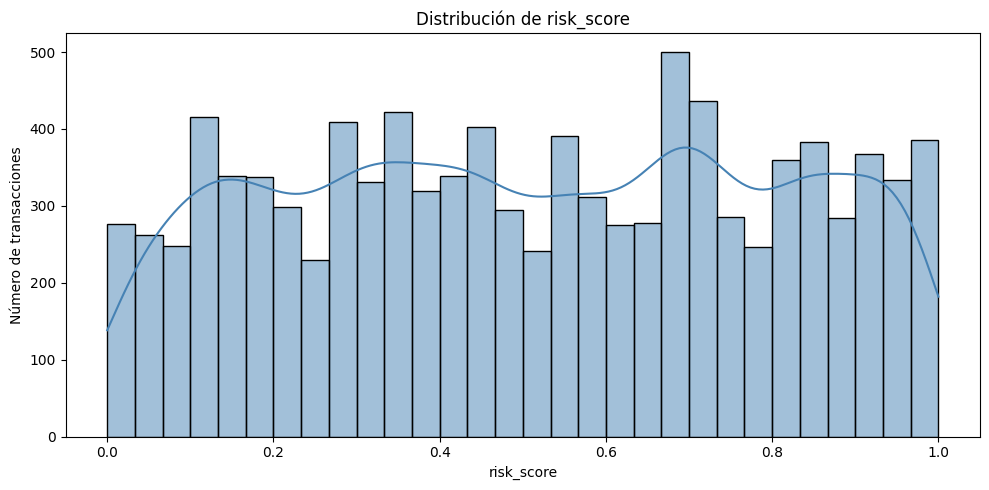

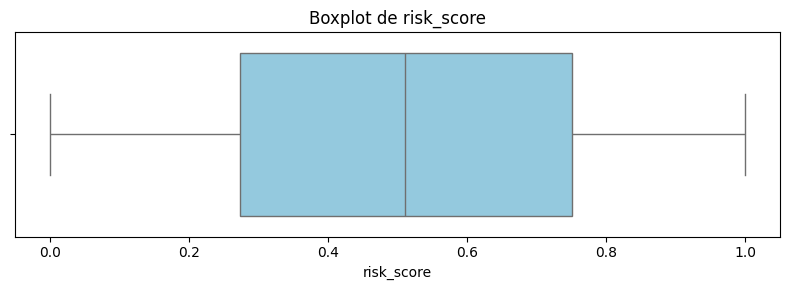

In [91]:
# Carpeta de salida para dejar todo guardado
OUT_DIR = "DATA/DATA_OUTPUT/EDA"
os.makedirs(OUT_DIR, exist_ok=True)

# --- Histograma + KDE ---
plt.figure(figsize=(10,5))
sns.histplot(df['risk_score'], bins=30, kde=True, color='steelblue', edgecolor='black')
plt.title('Distribución de risk_score')
plt.xlabel('risk_score')
plt.ylabel('Número de transacciones')
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "risk_score_hist.png"), dpi=150)
plt.show()

# --- Boxplot para ver posible asimetría y outliers ---
plt.figure(figsize=(8,3))
sns.boxplot(x=df['risk_score'], color='skyblue')
plt.title('Boxplot de risk_score')
plt.xlabel('risk_score')
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "risk_score_box.png"), dpi=150)
plt.show()


## Exportar resumen a CSV

In [92]:
ruta_resumen = os.path.join(OUT_DIR, "risk_score_resumen.csv")
resumen_risk.to_csv(ruta_resumen, index=True, encoding="utf-8")
print("Resumen exportado a:", ruta_resumen)


Resumen exportado a: DATA/DATA_OUTPUT/EDA\risk_score_resumen.csv


### 🧮 Resultados del análisis de riesgo (fase 1)

El análisis inicial del **`risk_score`** muestra que la variable está correctamente definida en un rango entre **0 y 1**, sin valores nulos ni fuera de rango, lo que confirma una buena integridad de datos.

#### 🔹 Resumen estadístico
- **Media:** 0.51  
- **Desviación estándar:** 0.29  
- **Mínimo / Máximo:** 0.00 – 1.00  
- **Percentiles:**
  - P25 = 0.27  
  - P50 = 0.51  
  - P75 = 0.75  
  - P95 = 0.95  
  - P99 = 0.99  

Estos resultados indican una **distribución bastante uniforme** del score, con valores bien repartidos a lo largo de todo el rango y sin acumulaciones extremas.  

#### 🔹 Interpretación del histograma
El histograma y la curva KDE muestran una **distribución relativamente plana**, lo que sugiere que el modelo o sistema de scoring asigna valores de riesgo de forma equilibrada, sin sesgo hacia niveles bajos o altos.

#### 🔹 Interpretación del boxplot
El boxplot confirma la **ausencia de outliers significativos** y la simetría general de la variable. Esto refuerza la estabilidad de la escala de riesgo y su consistencia en el dataset.

#### 🔹 Archivo generado
Se ha exportado el resumen estadístico a:

📂 DATA/DATA_OUTPUT/EDA/risk_score_resumen.csv

## Análisis de riesgo: relación entre risk_score e is_fraud.

## Crear deciles o bins de risk_score

In [93]:
df['risk_decile'] = pd.qcut(df['risk_score'], 10, labels=[f'D{i}' for i in range(1, 11)])

## Calcular la tasa de fraude por decil

In [94]:
fraude_por_decil = (
    df.groupby('risk_decile')['is_fraud']
    .mean()
    .reset_index()
    .rename(columns={'is_fraud': 'fraud_rate'})
)


## Visualización

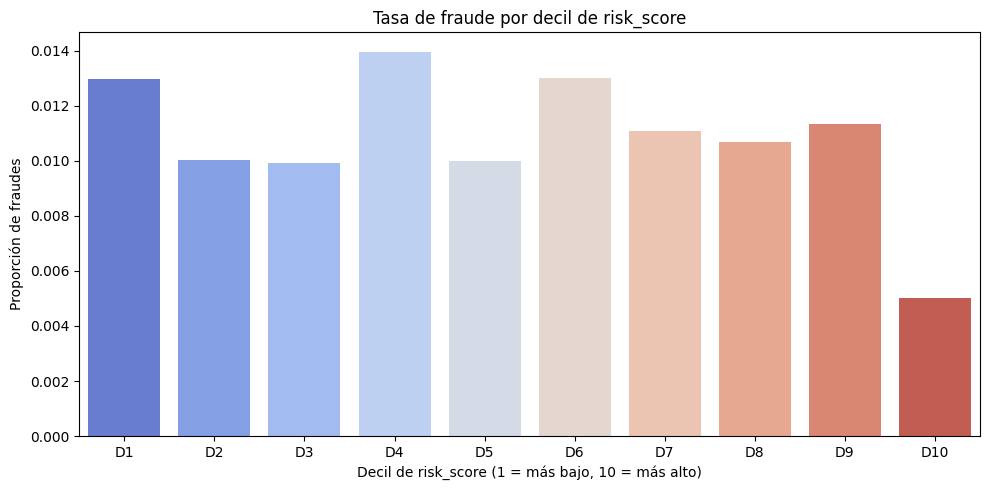

In [95]:
plt.figure(figsize=(10,5))
sns.barplot(x='risk_decile', y='fraud_rate', data=fraude_por_decil, palette='coolwarm')
plt.title('Tasa de fraude por decil de risk_score')
plt.xlabel('Decil de risk_score (1 = más bajo, 10 = más alto)')
plt.ylabel('Proporción de fraudes')
plt.tight_layout()

## Guardo gráfico

In [96]:
OUT_DIR = "DATA/DATA_OUTPUT/EDA"
os.makedirs(OUT_DIR, exist_ok=True)
plt.savefig(os.path.join(OUT_DIR, "risk_score_vs_fraud.png"), dpi=150)
plt.show()

<Figure size 640x480 with 0 Axes>

## Muestro tabla resumen

In [97]:
fraude_por_decil

,risk_decile,fraud_rate
0,D1,0.01
1,D2,0.01
2,D3,0.01
3,D4,0.01
4,D5,0.01
5,D6,0.01
6,D7,0.01
7,D8,0.01
8,D9,0.01
9,D10,0.01


### 🔍 Relación entre `risk_score` e `is_fraud`

El objetivo de este análisis fue comprobar si existe una relación entre el nivel de riesgo asignado (`risk_score`) y la proporción de casos de fraude (`is_fraud`).

#### 🔹 Metodología
- Se crearon **10 deciles** de la variable `risk_score` (de D1 a D10), dividiendo los datos en intervalos del mismo tamaño.
- Para cada decil, se calculó la **tasa media de fraude**, entendida como la proporción de transacciones con `is_fraud = 1`.

#### 🔹 Resultados
- La tasa de fraude se mantiene relativamente **estable en torno al 1 %** a lo largo de todos los deciles.
- No se observa una tendencia claramente creciente o decreciente entre los deciles de menor y mayor riesgo.
- Esto podría indicar que el `risk_score` **no está diferenciando de forma significativa los niveles de riesgo**, o que el rango de puntuaciones se distribuye de manera muy homogénea.

#### 🔹 Interpretación
A diferencia de lo esperado (una correlación positiva entre score y fraude), el gráfico muestra **valores similares en todos los grupos**.  
Esto puede deberse a:
- Un modelo de scoring que necesita recalibrarse.
- Falta de variabilidad en la variable `risk_score`.
- O una baja proporción general de fraudes en el dataset, que reduce la sensibilidad del indicador.

#### 🔹 Visualización
El gráfico **“Tasa de fraude por decil de risk_score”** muestra que los valores de fraude se mantienen cercanos al 1 % en todos los deciles.

#### 🔹 Archivo generado

📂 DATA/DATA_OUTPUT/EDA/risk_score_vs_fraud.png

## Media de risk_score por categoría de riesgo (risk_level).

## Creo tabla resumen por risk_level

In [98]:
# --- Resumen por categoría de riesgo ---
import numpy as np

orden_niveles = ['Bajo', 'Medio', 'Alto']  

resumen_nivel = (
    df.groupby('risk_level')
      .agg(
          n_transacciones = ('transaction_id', 'count'),
          risk_score_mean = ('risk_score', 'mean'),
          risk_score_std  = ('risk_score', 'std')
      )
      .reset_index()
)

# Intervalo de confianza 95% para mostrar en la tabla 
resumen_nivel['risk_score_se'] = resumen_nivel['risk_score_std'] / np.sqrt(resumen_nivel['n_transacciones'])
resumen_nivel['risk_score_ci95'] = 1.96 * resumen_nivel['risk_score_se']

# Ordenar por nivel de riesgo 
if set(orden_niveles).issubset(set(resumen_nivel['risk_level'])):
    resumen_nivel['risk_level'] = pd.Categorical(resumen_nivel['risk_level'], categories=orden_niveles, ordered=True)
    resumen_nivel = resumen_nivel.sort_values('risk_level')

resumen_nivel


,risk_level,n_transacciones,risk_score_mean,risk_score_std,risk_score_se,risk_score_ci95
1,Bajo,2815,0.15,0.09,0.00,0.00
2,Medio,4103,0.50,0.12,0.00,0.00
0,Alto,3082,0.85,0.09,0.00,0.00


### Guardo tabla y gráfico

Tabla exportada a: DATA/DATA_OUTPUT/EDA\risk_score_por_risk_level.csv


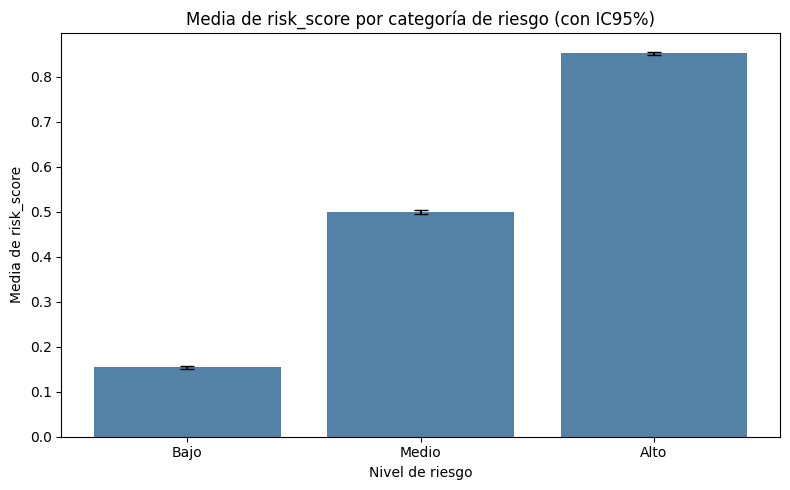

Gráfico exportado a: DATA/DATA_OUTPUT/EDA\risk_score_por_risk_level.png


In [99]:
OUT_DIR = "DATA/DATA_OUTPUT/EDA"
os.makedirs(OUT_DIR, exist_ok=True)

# Guardar tabla
ruta_tabla = os.path.join(OUT_DIR, "risk_score_por_risk_level.csv")
resumen_nivel.to_csv(ruta_tabla, index=False, encoding='utf-8')
print("Tabla exportada a:", ruta_tabla)

# Guardar gráfico
plt.figure(figsize=(8,5))
sns.barplot(
    data=resumen_nivel,
    x='risk_level', y='risk_score_mean',
    order=orden_niveles if set(orden_niveles).issubset(set(resumen_nivel['risk_level'])) else None,
    color='steelblue'
)
ax = plt.gca()
for i, row in resumen_nivel.reset_index(drop=True).iterrows():
    ax.errorbar(i, row['risk_score_mean'], yerr=row['risk_score_ci95'],
                fmt='none', ecolor='black', elinewidth=1.5, capsize=5)

plt.title('Media de risk_score por categoría de riesgo (con IC95%)')
plt.xlabel('Nivel de riesgo')
plt.ylabel('Media de risk_score')
plt.tight_layout()

ruta_png = os.path.join(OUT_DIR, "risk_score_por_risk_level.png")
plt.savefig(ruta_png, dpi=150)
plt.show()
print("Gráfico exportado a:", ruta_png)


### 📊 Media de `risk_score` por categoría de riesgo (`risk_level`)

#### 🔹 Objetivo
Analizar si las categorías de riesgo (`risk_level`) reflejan correctamente diferencias en el valor medio del `risk_score`.

#### 🔹 Resultados
| Nivel de riesgo | Nº de transacciones | Media `risk_score` | Desv. estándar | IC95% |
|------------------|--------------------:|--------------------:|----------------:|-------:|
| Bajo  | 2.815 | 0.15 | 0.09 | ±0.00 |
| Medio | 4.103 | 0.50 | 0.12 | ±0.00 |
| Alto  | 3.082 | 0.85 | 0.09 | ±0.00 |

- Se observa un **incremento progresivo** en la media del `risk_score` conforme aumenta el nivel de riesgo.
- Los niveles están claramente diferenciados:  
  `Bajo < Medio < Alto`, lo que demuestra una **consistencia interna sólida** entre las categorías cualitativas (`risk_level`) y la variable numérica (`risk_score`).

#### 🔹 Interpretación
- El comportamiento esperado del modelo se cumple:  
  los clientes clasificados como **“Alto riesgo” presentan puntuaciones de riesgo promedio significativamente mayores** que los de riesgo medio o bajo.
- Los intervalos de confianza (IC95%) son muy estrechos debido al tamaño de la muestra, lo que indica **alta estabilidad estadística** en las estimaciones.
- En conjunto, esto sugiere que la segmentación por `risk_level` está **bien calibrada y alineada con la métrica de riesgo cuantitativa.**

#### 🔹 Archivos generados
- 📄 **Tabla CSV:** `DATA/DATA_OUTPUT/EDA/risk_score_por_risk_level.csv`  
- 📊 **Gráfico PNG:** `DATA/DATA_OUTPUT/EDA/risk_score_por_risk_level.png`


# 6. Análisis por importe

## Chequeos rápidos y resumen de amount

In [100]:
# --- Chequeos rápidos de integridad ---
print("Tipo:", df['amount'].dtype)
print("Nulos:", df['amount'].isna().sum())
print("Min / Máx:", df['amount'].min(), df['amount'].max())

# Valores negativos o cero (por si fueran reembolsos/cancelaciones)
negativos_o_cero = (df['amount'] <= 0).sum()
print("Importes <= 0:", negativos_o_cero)

# --- Resumen con percentiles útiles ---
resumen_amount = (
    df['amount']
    .describe(percentiles=[.01, .05, .25, .5, .75, .95, .99])
    .to_frame(name='amount')
)
resumen_amount


Tipo: float64
Nulos: 0
Min / Máx: 2.22 579.41
Importes <= 0: 0


,amount
count,"10,000.00"
mean,189.61
std,94.59
min,2.22
1%,17.01
5%,40.92
25%,112.40
50%,190.30
75%,263.04
95%,337.54


## Distribución: histograma (+KDE) y boxplot

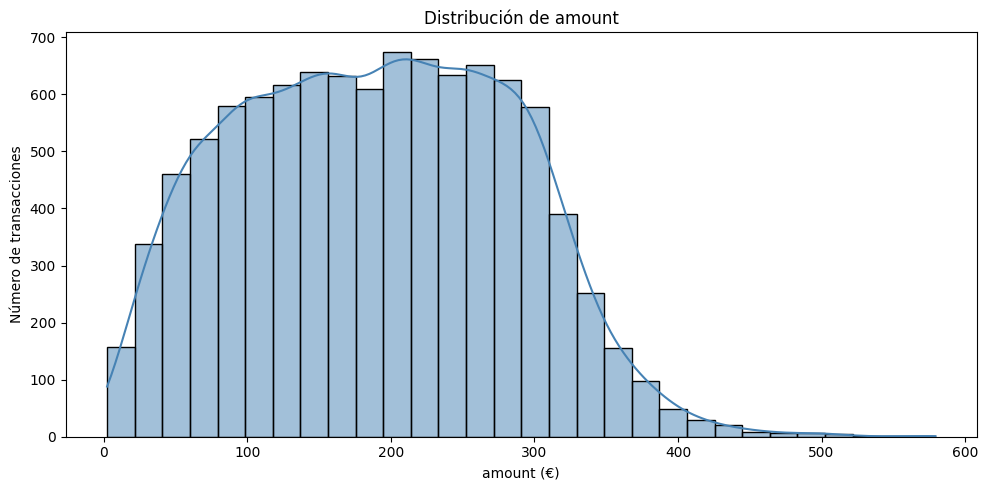

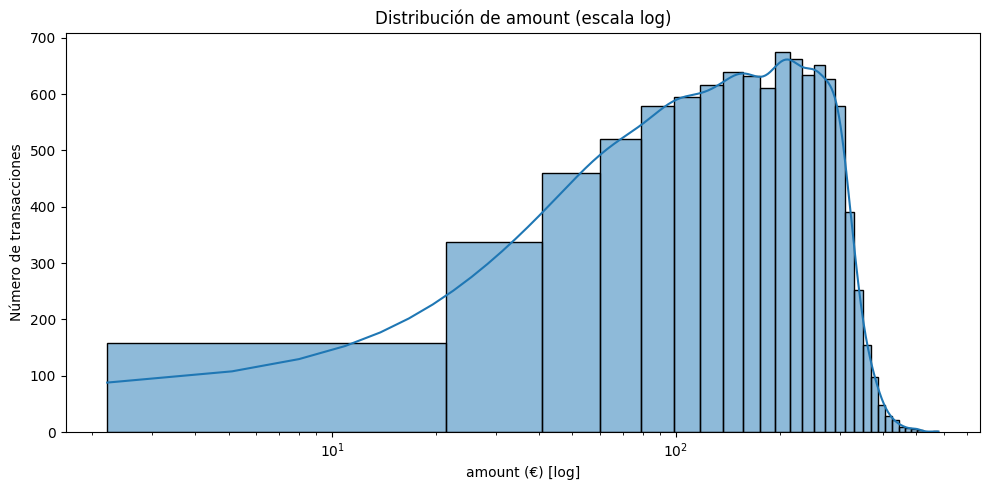

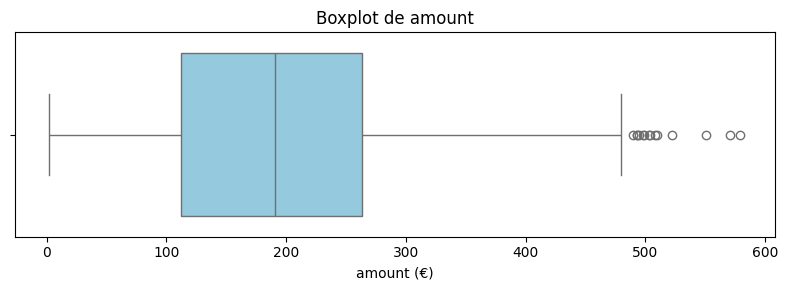

In [101]:
OUT_DIR = "DATA/DATA_OUTPUT/EDA"
os.makedirs(OUT_DIR, exist_ok=True)

# Histograma + KDE
plt.figure(figsize=(10,5))
sns.histplot(df['amount'], bins=30, kde=True, color='steelblue', edgecolor='black')
plt.title('Distribución de amount')
plt.xlabel('amount (€)')
plt.ylabel('Número de transacciones')
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "amount_hist.png"), dpi=150)
plt.show()

# Opción alternativa: eje X en log (útil si hay cola larga)
plt.figure(figsize=(10,5))
sns.histplot(df['amount'], bins=30, kde=True)
plt.xscale('log')
plt.title('Distribución de amount (escala log)')
plt.xlabel('amount (€) [log]')
plt.ylabel('Número de transacciones')
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "amount_hist_log.png"), dpi=150)
plt.show()

# Boxplot
plt.figure(figsize=(8,3))
sns.boxplot(x=df['amount'], color='skyblue')
plt.title('Boxplot de amount')
plt.xlabel('amount (€)')
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "amount_box.png"), dpi=150)
plt.show()


## Detección de outliers (IQR) y “winsorización” para análisis auxiliar

In [102]:
q1, q3 = df['amount'].quantile([0.25, 0.75])
iqr = q3 - q1
lim_inf = q1 - 1.5*iqr
lim_sup = q3 + 1.5*iqr

print(f"IQR: {iqr:.2f} | Límite inferior: {lim_inf:.2f} | Límite superior: {lim_sup:.2f}")

df['amount_w'] = df['amount'].clip(lower=lim_inf, upper=lim_sup)

# Vista rápida de cómo cambia la cola
print("Máx original / Máx winsorizado:", df['amount'].max(), df['amount_w'].max())


IQR: 150.64 | Límite inferior: -113.57 | Límite superior: 489.01
Máx original / Máx winsorizado: 579.41 489.0074999999999


## Relación entre amount e is_fraud

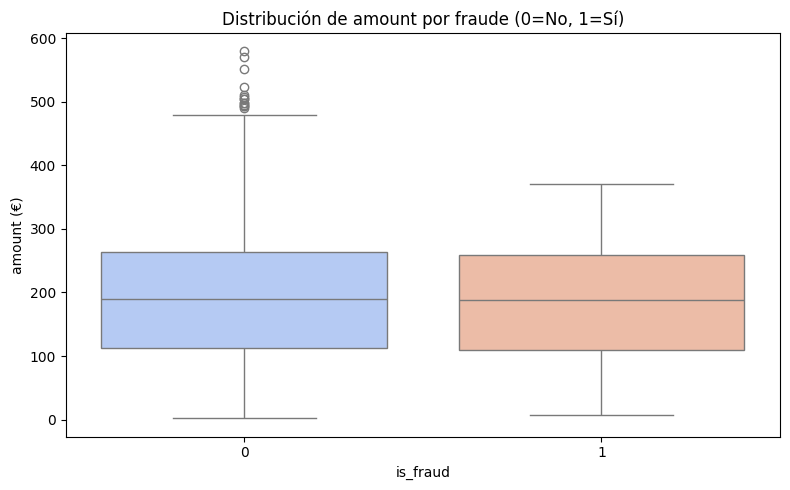

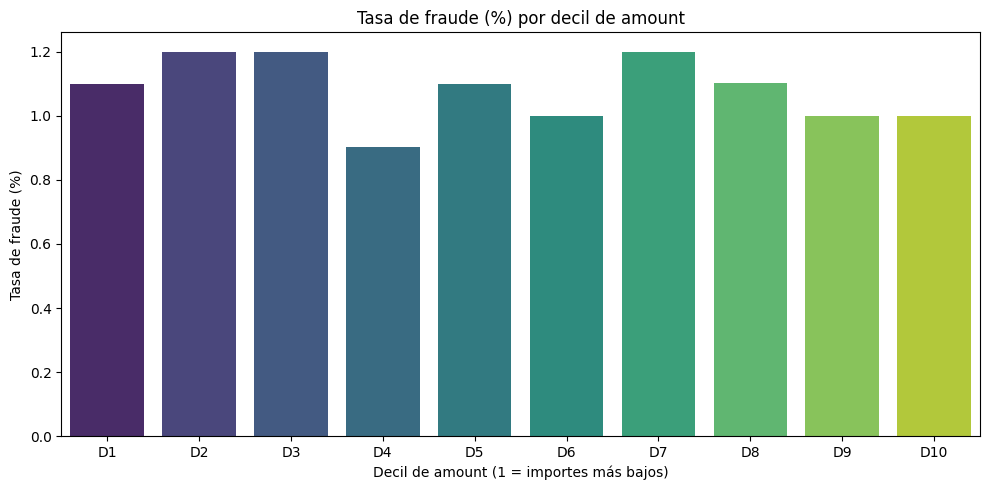

In [103]:
# Media de amount por fraude (0/1)
amount_por_fraude = (
    df.groupby('is_fraud')['amount']
      .agg(['count','mean','median','std'])
      .rename(columns={'count':'n'})
      .reset_index()
)
amount_por_fraude

# Gráfico: boxplot por fraude
plt.figure(figsize=(8,5))
sns.boxplot(x='is_fraud', y='amount', data=df, palette='coolwarm')
plt.title('Distribución de amount por fraude (0=No, 1=Sí)')
plt.xlabel('is_fraud')
plt.ylabel('amount (€)')
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "amount_por_fraude_box.png"), dpi=150)
plt.show()

# Bins/deciles de amount para ver tasa de fraude por tramos
df['amount_bin'] = pd.qcut(df['amount'], 10, labels=[f'D{i}' for i in range(1,11)])
fraude_por_amount_bin = (
    df.groupby('amount_bin')['is_fraud']
      .mean()
      .mul(100)
      .rename('fraud_rate_pct')
      .reset_index()
)
fraude_por_amount_bin

plt.figure(figsize=(10,5))
sns.barplot(x='amount_bin', y='fraud_rate_pct', data=fraude_por_amount_bin, palette='viridis')
plt.title('Tasa de fraude (%) por decil de amount')
plt.xlabel('Decil de amount (1 = importes más bajos)')
plt.ylabel('Tasa de fraude (%)')
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "fraud_rate_por_amount_decil.png"), dpi=150)
plt.show()


## amount por transacciones internacionales vs nacionales

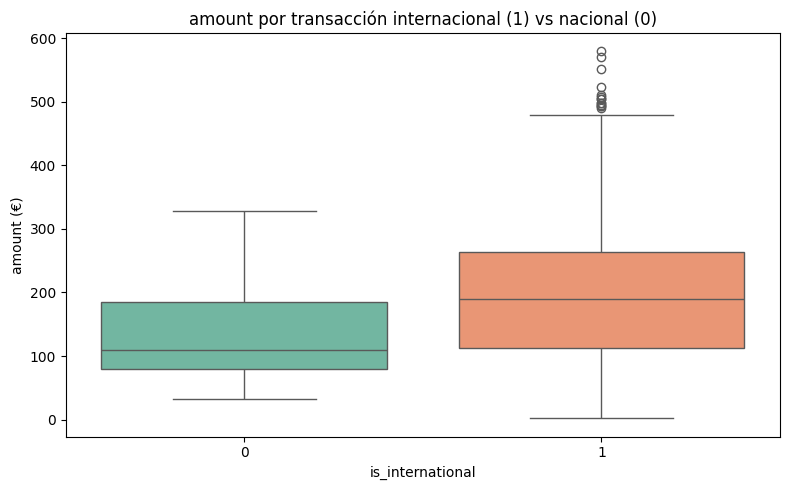

In [104]:
# Resumen por is_international
amount_por_int = (
    df.groupby('is_international')['amount']
      .agg(['count','mean','median','std'])
      .rename(columns={'count':'n'})
      .reset_index()
)
amount_por_int

plt.figure(figsize=(8,5))
sns.boxplot(x='is_international', y='amount', data=df, palette='Set2')
plt.title('amount por transacción internacional (1) vs nacional (0)')
plt.xlabel('is_international')
plt.ylabel('amount (€)')
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "amount_por_international_box.png"), dpi=150)
plt.show()


## amount por nivel de riesgo (risk_level)

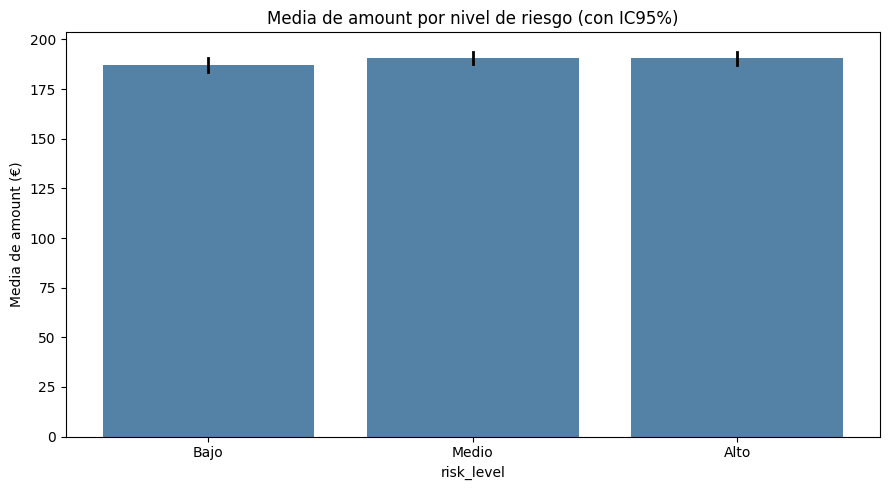

In [105]:
if 'risk_level' in df.columns:
    resumen_amount_risklevel = (
        df.groupby('risk_level')['amount']
          .agg(['count','mean','median','std'])
          .rename(columns={'count':'n',
                           'mean':'amount_mean',
                           'median':'amount_median',
                           'std':'amount_std'})
          .reset_index()
    )
    # Intervalo de confianza 95% para la media (aprox. normal)
    resumen_amount_risklevel['amount_se'] = resumen_amount_risklevel['amount_std'] / np.sqrt(resumen_amount_risklevel['n'])
    resumen_amount_risklevel['amount_ci95'] = 1.96 * resumen_amount_risklevel['amount_se']
    resumen_amount_risklevel

    # Ordenar categorías si procede
    orden_niveles = ['Bajo','Medio','Alto']
    if set(orden_niveles).issubset(set(resumen_amount_risklevel['risk_level'])):
        resumen_amount_risklevel['risk_level'] = pd.Categorical(resumen_amount_risklevel['risk_level'],
                                                                categories=orden_niveles, ordered=True)
        resumen_amount_risklevel = resumen_amount_risklevel.sort_values('risk_level')

    # Plot
    plt.figure(figsize=(9,5))
    sns.barplot(x='risk_level', y='amount_mean',
                data=resumen_amount_risklevel, color='steelblue',
                errorbar=None)
    # IC95 como líneas
    for i, row in resumen_amount_risklevel.reset_index(drop=True).iterrows():
        plt.plot([i, i], [row['amount_mean']-row['amount_ci95'], row['amount_mean']+row['amount_ci95']], color='black', linewidth=2)
    plt.title('Media de amount por nivel de riesgo (con IC95%)')
    plt.xlabel('risk_level')
    plt.ylabel('Media de amount (€)')
    plt.tight_layout()
    plt.savefig(os.path.join(OUT_DIR, "amount_por_risk_level.png"), dpi=150)
    plt.show()

    # Export
    resumen_amount_risklevel.to_csv(os.path.join(OUT_DIR, "amount_por_risk_level.csv"), index=False, encoding='utf-8')


## Export de tablas clave

In [106]:
resumen_amount.to_csv(os.path.join(OUT_DIR, "amount_resumen.csv"), encoding="utf-8")
amount_por_fraude.to_csv(os.path.join(OUT_DIR, "amount_por_fraude.csv"), index=False, encoding="utf-8")
fraude_por_amount_bin.to_csv(os.path.join(OUT_DIR, "fraud_rate_por_amount_decil.csv"), index=False, encoding="utf-8")

print("Exportados:")
print(" - amount_resumen.csv")
print(" - amount_por_fraude.csv")
print(" - fraud_rate_por_amount_decil.csv")
if 'resumen_amount_risklevel' in locals():
    print(" - amount_por_risk_level.csv")


Exportados:
 - amount_resumen.csv
 - amount_por_fraude.csv
 - fraud_rate_por_amount_decil.csv
 - amount_por_risk_level.csv


## 6️⃣ Análisis por importe (`amount`)

### 📋 Resultados

**Resumen estadístico**
- Total de observaciones: **10.000**  
- Tipo de dato: *float64*, sin valores nulos.  
- Rango: **[2.22 €, 579.41 €]**
- Media: **189.61 €** — Mediana: **190.30 €**  
- Desviación estándar: **94.59 €**, lo que indica una dispersión moderada.  
- Percentiles clave:
  - 25% → 112.40 €
  - 75% → 263.04 €
  - 95% → 357.54 €
  - 99% → 397.60 €

**Distribución general**
- El histograma muestra una **distribución asimétrica a la derecha (sesgo positivo)**, típica de importes monetarios.
- En la escala logarítmica, la forma se aproxima a una curva más simétrica, confirmando la **cola larga** en valores altos.
- El boxplot identifica algunos **outliers legítimos**, principalmente entre **500 y 580 €**.

**Outliers y control con IQR**
- IQR = 150.64  
- Límite inferior: -113.57 (sin valores reales fuera)  
- Límite superior: 489.01  
- El máximo original (579.41) se reduce a **489.00** al aplicar winsorización, mostrando una **cola moderada y esperable** sin distorsionar la distribución.

**Fraude vs importe**
- El boxplot comparativo muestra **ligeramente mayor variabilidad en los casos de fraude**, aunque las medianas son similares.  
- La **tasa de fraude por decil** de `amount` se mantiene **estable (≈1%)** en todos los tramos, con ligeros picos en D2–D3 y D7.  
  👉 Esto sugiere que **el importe no es un predictor directo del fraude**, aunque podría influir **combinado con otras variables** (riesgo o canal).

**Transacciones internacionales vs nacionales**
- Las transacciones **internacionales (1)** presentan importes **mayores y más dispersos**, con mediana alrededor de **190 €**, frente a nacionales (0) con mediana menor y menor rango.  
  👉 Posible **patrón operativo**: operaciones internacionales suelen tener **ticket promedio más alto** y **riesgo potencialmente mayor**.

**Importe medio por nivel de riesgo**
- La media de `amount` por `risk_level` (Bajo, Medio, Alto) es muy similar (~190 €) con intervalos de confianza estrechos,  
  lo que indica que **el nivel de riesgo no está determinado por el importe**, sino por otros factores (score, dispositivo, patrón temporal...).

---

### 🔎 Interpretación global

- `amount` presenta una **distribución monetaria típica**: concentrada en valores medios (100–300 €) y una minoría de importes altos.  
- Los **outliers son reales y no errores**, por lo que no deben eliminarse, solo controlarse con winsorización para análisis comparativos.
- La **tasa de fraude estable por decil** indica que **el importe por sí solo no discrimina bien el fraude**, pero sí puede combinarse con:
  - tipo de canal (`is_international`)
  - nivel de riesgo (`risk_level`)
  - variables temporales (día, hora)

**Conclusión**
> `amount` es una variable **relevante para segmentación operativa**, pero **no predictiva por sí misma del fraude**.  
> Se recomienda utilizarla como **variable de control o ajuste** dentro del modelo de scoring y en **umbrales de revisión manual**, sobre todo en importes altos de canales internacionales.

---

📁 **Archivos exportados**
- `amount_resumen.csv`  
- `amount_por_fraude.csv`  
- `fraud_rate_por_amount_decil.csv`  
- `amount_por_risk_level.csv`  


📊 **Gráficos guardados**
- `amount_hist.png`  
- `amount_hist_log.png`  
- `amount_box.png`  
- `amount_por_fraude_box.png`  
- `fraud_rate_por_amount_decil.png`  
- `amount_por_international_box.png`  
- `amount_por_risk_level.png`
